Saved new image to output-crop.jpg


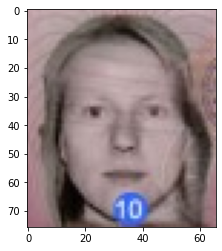

In [26]:
# import argparse
import os, io
import matplotlib.pyplot as plt
from google.cloud import vision_v1 as vision
from PIL import Image, ImageDraw

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r'Demz_vision_API_token.json'

FILE_NAME = 'test13.jpg'
FOLDER_PATH = 'C:\\Users\\USER\\Desktop\\NEW_DEMZ\\OCR\\OCR_Works\\Google\\images'
img_path = os.path.join(FOLDER_PATH, FILE_NAME)
client = vision.ImageAnnotatorClient()

with io.open(img_path, 'rb') as image_file:
        content = image_file.read()

image = vision.Image(content=content)

crop_hints_params = vision.CropHintsParams(aspect_ratios=[1.77])

response_face = client.face_detection(image=image)
faceAnnotations = response_face.face_annotations

def get_crop_hint(crop_hints):
    """Detect crop hints on a single image and return the first result."""
    
    image_context = vision.ImageContext(crop_hints_params=crop_hints_params)

    response = client.crop_hints(image=image, image_context=image_context)
    hints = response.crop_hints_annotation.crop_hints

    # Get bounds for the first crop hint using an aspect ratio of 1.77.
    vertices = hints[0].bounding_poly.vertices

    return vertices

# draw = None

def draw_hint(image_file, crop_hints):
    """Draw a border around the image using the hints in the vector list."""
    vects = get_crop_hint(crop_hints)

    im = Image.open(image_file)
    draw = ImageDraw.Draw(im)
    draw.polygon([
        vects[0].x, vects[0].y,
        vects[1].x, vects[1].y,
        vects[2].x, vects[2].y,
        vects[3].x, vects[3].y], None, 'red')
    im.save('output-hint.jpg', 'JPEG')
    print('Saved new image to output-hint.jpg')

def display_croped_img(img):

    draw = ImageDraw.Draw(img)
    draw.line((0, 0) + img.size, fill=128)
    draw.line((5, img.size[1], img.size[0], 0), fill=128)
    return img
    

def crop_to_hint(image_file):
    """Crop the image using the hints in the vector list."""
    vects = get_crop_hint(image_file)
    
    face_bounds = []
    for face in faceAnnotations:
        face_vertices = (['({0},{1})'.format(vertex.x, vertex.y) for vertex in face.bounding_poly.vertices])
        face_bounds.append(face_vertices)
    bound_1 = face_bounds[0][0]
    bound_2 = face_bounds[0][2]
    bound_1 = eval(bound_1)
    bound_2 = eval(bound_2)

    im = Image.open(image_file)
    im2 = im.crop([bound_1[0], bound_1[1],
                  bound_2[0] - 1, bound_2[1] - 1])
    plt.imshow(im2)
    im2.save('output-crop.jpg', 'JPEG')
    print('Saved new image to output-crop.jpg')


if __name__ == '__main__':
    crop_to_hint(img_path)
#     image = Image.open('output-crop.jpg')
#     draw = ImageDraw.Draw(image)
